# 01. Библиотека PyTorch

## План
1. `numpy` -> `pytorch`
2. Автоматическое дифференцирование (`torch.autograd`)

Если успеем

3. Пример: задача регрессии
4. BONUS! Переопределение `backward()`


[PyTorch](https://pytorch.org) - это фреймворк для машинного обучения:
* В первую очередь - для нейросетевых моделей
* Большие возможности для работы с тензорами
* Поддержка выполнения на CPU / GPU / TPU ([!](https://github.com/pytorch/xla))
* Автоматическое дифференцирование вычислительных графов (`torch.autograd`)
* Широкий набор строительных блоков для DL-моделей (`torch.nn`) и готовых архитектур (`torchvision.models`+)
* Удобная поддержка реализации своих операций / слоев / функций потерь / ...

## 1. `numpy` <-> `pytorch`

In [1]:
import torch
import numpy as np
import time

### 1.1. Работа с тензорами

~Все, что можно делать с многомерными массивами в `numpy`, можно делать и в `pytorch`:
* `np.ndarray` -> `torch.Tensor`
    * [broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html)
* `np.zeros()` -> `torch.zeros()`
* `np.stack()` -> `torch.stack()`
* `np.concatenate` -> `torch.cat()` 
* `np.random.normal()` -> `torch.randn()`
* ...

#### `np.ndarray` <-> `torch.Tensor`

In [2]:
data_np = np.random.uniform(size=(3, 3))
data_np.shape

(3, 3)

In [3]:
data_np

array([[0.12095388, 0.65874876, 0.90675139],
       [0.83805525, 0.45104611, 0.86043494],
       [0.32903411, 0.85679865, 0.3005737 ]])

Создание тензора из данных в форме `numpy.ndarray` через [`torch.from_numpy()`](https://pytorch.org/docs/stable/generated/torch.from_numpy.html):

In [4]:
data_pt = torch.from_numpy(data_np)
data_pt.shape

torch.Size([3, 3])

In [5]:
data_np == data_pt.numpy()  # <- get data from Tensor as numpy array

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [6]:
data_np.dtype

dtype('float64')

In [7]:
data_pt.dtype

torch.float64

Важно: при создании тензора через `torch.from_numpy()` данные шарятся между объектами:

In [8]:
t = data_pt.numpy() 
t -= 1000
data_pt

tensor([[-999.8790, -999.3413, -999.0932],
        [-999.1619, -999.5490, -999.1396],
        [-999.6710, -999.1432, -999.6994]], dtype=torch.float64)

In [9]:
data_np

array([[-999.87904612, -999.34125124, -999.09324861],
       [-999.16194475, -999.54895389, -999.13956506],
       [-999.67096589, -999.14320135, -999.6994263 ]])

Создание тензора через конструктор `torch.tensor()`:

In [10]:
data_np = np.random.uniform(size=(3, 3))
data_np.shape

(3, 3)

In [11]:
data_pt = torch.tensor(data_np)
data_pt.shape

torch.Size([3, 3])

In [12]:
data_np == data_pt.numpy()

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

При создании тензора через `torch.tensor()` данные копируются:

In [13]:
t = data_pt.numpy()
t -= 1000
data_pt

tensor([[-999.3459, -999.6279, -999.7200],
        [-999.0103, -999.1051, -999.4909],
        [-999.1178, -999.3649, -999.5509]], dtype=torch.float64)

In [14]:
data_np

array([[0.65406286, 0.37206751, 0.28003485],
       [0.98974805, 0.89490742, 0.50907501],
       [0.88215851, 0.63514242, 0.44911788]])

**NB**: [`torch.Tensor()`](https://glaringlee.github.io/tensors.html?highlight=torch%20tensor#torch.Tensor) != [`torch.tensor()`](https://glaringlee.github.io/generated/torch.tensor.html?highlight=torch%20tensor#torch.tensor)!

#### Типы данных

In [15]:
data_np.dtype

dtype('float64')

floats

In [16]:
data_pt = torch.tensor(data_np)
data_pt.dtype

torch.float64

In [17]:
data_pt = torch.tensor(data_np, dtype=torch.float)
data_pt.dtype

torch.float32

In [18]:
data_pt = torch.tensor(data_np, dtype=torch.float16)
data_pt.dtype

torch.float16

In [19]:
data_pt = torch.tensor(data_np, dtype=torch.half)
data_pt.dtype

torch.float16

In [20]:
data_pt = torch.tensor(data_np, dtype=torch.double)
data_pt.dtype

torch.float64

ints

In [21]:
data_pt = torch.tensor(data_np, dtype=torch.int)
data_pt.dtype

torch.int32

In [22]:
data_pt = torch.tensor(data_np, dtype=torch.long)
data_pt.dtype

torch.int64

In [23]:
data_pt = torch.tensor(data_np, dtype=torch.int8)
data_pt.dtype

torch.int8

Больше - [тут](https://pytorch.org/docs/stable/tensors.html).

Можно и без `numpy`, разумеется:

In [24]:
torch.tensor(2)

tensor(2)

In [25]:
torch.tensor([1, 2, 3, 4, 5])

tensor([1, 2, 3, 4, 5])

In [26]:
torch.tensor([[0., 1], [2, 3]])

tensor([[0., 1.],
        [2., 3.]])

Если в тензоре один-единственный элемент, извлечь его численное значение можно через `.item()`:

In [27]:
x = torch.tensor(10)
x.item()

10

In [28]:
x = torch.tensor([10, 11])
x.item()

ValueError: only one element tensors can be converted to Python scalars

**NB**: поведение конструкторов `torch.tensor()` и `torch.Tensor()` - разное:

In [29]:
torch.Tensor([1, 2, 3])

tensor([1., 2., 3.])

In [30]:
torch.Tensor(1)

tensor([1.4955e-36])

In [31]:
torch.Tensor(2)

tensor([1.5414e-43, 1.6115e-43])

#### Broadcasting

In [32]:
data_np = np.random.uniform(size=(3, 3))
data_pt = torch.from_numpy(data_np)
data_pt

tensor([[0.9391, 0.3789, 0.2596],
        [0.4269, 0.9906, 0.3595],
        [0.0092, 0.8850, 0.5577]], dtype=torch.float64)

In [33]:
data_pt -= 100
data_pt

tensor([[-99.0609, -99.6211, -99.7404],
        [-99.5731, -99.0094, -99.6405],
        [-99.9908, -99.1150, -99.4423]], dtype=torch.float64)

Обратите внимание на особенности broadcasting в "неочевидных" случаях (часто лучше перепроверить):

In [34]:
data_np = np.random.uniform(size=(3, 3)).astype(np.float32)
data_pt = torch.from_numpy(data_np)
data_pt

tensor([[0.6908, 0.3719, 0.7902],
        [0.5878, 0.5233, 0.7827],
        [0.4131, 0.6344, 0.9131]])

In [35]:
b = torch.Tensor([100, 50, 0])
b.shape

torch.Size([3])

In [36]:
data_pt + b

tensor([[100.6908,  50.3719,   0.7902],
        [100.5878,  50.5233,   0.7827],
        [100.4131,  50.6344,   0.9131]])

In [37]:
b = torch.Tensor([100, 50, 0]).view(1, 3)
b.shape

torch.Size([1, 3])

In [38]:
data_pt + b

tensor([[100.6908,  50.3719,   0.7902],
        [100.5878,  50.5233,   0.7827],
        [100.4131,  50.6344,   0.9131]])

In [39]:
b = torch.Tensor([100, 50, 0]).view(3, 1)
b.shape

torch.Size([3, 1])

In [40]:
data_pt + b

tensor([[100.6908, 100.3719, 100.7902],
        [ 50.5878,  50.5233,  50.7827],
        [  0.4131,   0.6344,   0.9131]])

#### Векторные и матричные операции

In [20]:
data_np = np.random.uniform(size=(16, 16))
data_pt = torch.from_numpy(data_np)

In [22]:
%timeit data_np @ data_np

1.37 µs ± 35 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [24]:
%timeit data_pt @ data_pt

2.77 µs ± 36 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [25]:
x = torch.randn(4, 1)
A = torch.randn(8, 4)

Умножение матрицы на вектор:

In [26]:
y = A @ x
y.shape, y

(torch.Size([8, 1]),
 tensor([[ 2.1490],
         [ 2.0846],
         [-4.1863],
         [ 1.8538],
         [ 0.3149],
         [-3.0075],
         [-1.6304],
         [ 0.2678]]))

In [27]:
y = A.matmul(x)
y.shape, y

(torch.Size([8, 1]),
 tensor([[ 2.1490],
         [ 2.0846],
         [-4.1863],
         [ 1.8538],
         [ 0.3149],
         [-3.0075],
         [-1.6304],
         [ 0.2678]]))

Тоже повнимательнее с размерностями:

In [28]:
x = torch.randn(4)
A = torch.randn(8, 4)

In [29]:
y = A @ x
y.shape, y

(torch.Size([8]),
 tensor([-1.8140, -1.1285,  0.8103,  1.3414, -2.0703,  1.1084, -1.6084,  4.4085]))

#### Задание:

* Даны два набора векторов одинаковой размерности, `X` (`m x dim`) и `Y` (`n x dim`)
* Требуется посчитать (без циклов!) попарные значения косинуса углов для всех пар (`x`, `y`)
    * На выходе ожидается матрица размером (`m x n`)

In [33]:
dim = 8
m = 11
n = 17
X = torch.randn(m, dim)
Y = torch.randn(n, dim)

# YOUR CODE HERE

X_norm = (X@X.T).diag().sqrt()
Y_norm = (Y@Y.T).diag().sqrt()

pairiwse_norms = X_norm.unsqueeze(1) @ Y_norm.unsqueeze(1).T

cos_mat = X@Y.T / pairiwse_norms
# END OF YOUR CODE

In [34]:
from scipy.spatial.distance import cdist
cos_mat_expected = 1 - cdist(X, Y, metric="cosine")

torch.testing.assert_allclose(cos_mat, cos_mat_expected)

#### Работа с размерностями

In [35]:
x = torch.randn(3, 1)
x.shape, x

(torch.Size([3, 1]),
 tensor([[-0.6021],
         [-0.9067],
         [-0.9903]]))

Транспонирование:

In [36]:
xT = x.T
xT.shape, xT

(torch.Size([1, 3]), tensor([[-0.6021, -0.9067, -0.9903]]))

Если не указано явно, то данные НЕ копируются:

In [37]:
xT *= 100
xT

tensor([[-60.2141, -90.6653, -99.0299]])

In [38]:
x

tensor([[-60.2141],
        [-90.6653],
        [-99.0299]])

С копированием:

In [39]:
xT_clone = x.T.clone()
xT_clone.shape, xT_clone

(torch.Size([1, 3]), tensor([[-60.2141, -90.6653, -99.0299]]))

In [40]:
xT_clone == xT

tensor([[True, True, True]])

In [41]:
xT_clone *= 100
xT_clone

tensor([[-6021.4150, -9066.5264, -9902.9941]])

In [42]:
x

tensor([[-60.2141],
        [-90.6653],
        [-99.0299]])

Доступны и более сложные операции над размерностями.

`permute()`:

In [43]:
x = torch.randn(3, 64, 256)
x.shape

torch.Size([3, 64, 256])

In [44]:
x.permute(1, 2, 0).shape

torch.Size([64, 256, 3])

In [45]:
x.transpose(1, 2).shape

torch.Size([3, 256, 64])

`view()`:

In [46]:
x = torch.randn(3, 64, 256)
x.shape

torch.Size([3, 64, 256])

In [47]:
x.view(3, 256, 64).shape

torch.Size([3, 256, 64])

In [48]:
x.view(3, -1).shape

torch.Size([3, 16384])

In [49]:
x.view(-1).shape

torch.Size([49152])

In [50]:
z = x.view(-1)
z

tensor([ 0.7315, -0.2704,  1.1011,  ..., -0.0500, -0.2438, -1.1110])

In [51]:
z *= 0

In [52]:
z

tensor([0., -0., 0.,  ..., -0., -0., -0.])

In [53]:
x

tensor([[[0., -0., 0.,  ..., 0., -0., -0.],
         [-0., -0., -0.,  ..., 0., 0., -0.],
         [0., 0., 0.,  ..., -0., 0., -0.],
         ...,
         [-0., 0., 0.,  ..., -0., -0., 0.],
         [-0., -0., -0.,  ..., -0., -0., -0.],
         [0., 0., -0.,  ..., -0., 0., 0.]],

        [[-0., 0., -0.,  ..., -0., 0., -0.],
         [0., -0., -0.,  ..., -0., -0., 0.],
         [0., -0., -0.,  ..., 0., -0., -0.],
         ...,
         [0., 0., 0.,  ..., -0., -0., -0.],
         [-0., 0., 0.,  ..., 0., -0., 0.],
         [-0., -0., -0.,  ..., -0., -0., -0.]],

        [[0., 0., -0.,  ..., -0., 0., 0.],
         [-0., -0., -0.,  ..., -0., -0., -0.],
         [0., -0., -0.,  ..., -0., 0., 0.],
         ...,
         [-0., -0., -0.,  ..., -0., 0., -0.],
         [-0., -0., 0.,  ..., 0., -0., -0.],
         [-0., -0., -0.,  ..., -0., -0., -0.]]])

Больше - [тут](https://jhui.github.io/2018/02/09/PyTorch-Basic-operations/).

#### Задание:

* Создать тензор размером `1x3x224x224` (имитируем батч из одной картинки с 3 каналами RGB размером `224х224`)
    * Все значения в тензоре = `0.5`
* Выполнить нормализацию через mean / std из датасета Imagenet:
    * mean = `[0.485, 0.456, 0.406]`
    * std = `[0.229, 0.224, 0.225]`
* Посчитать среднее значение по каждому из 3-х каналов полученного тензора
    * Ответ (`output`) должен иметь размерность (3,)


NB: агрегирующие операции типа `min`/`max`/`mean`/... устроены аналогично в `numpy` и `torch`, но отличаютеся ключевым словом для уточнения размерностей:
* в `numpy` - `axis`
* в `torch` - `dim`

In [44]:
# YOUR CODE HERE

X = torch.ones(1,3,224,224) * 0.5

mean = torch.tensor([0.485, 0.456, 0.406])
std = torch.tensor([0.229, 0.224, 0.225])

normalized = (X - mean.view(-1,1,1)) / std.view(-1,1,1)

output = normalized.mean(dim=[2,3]).squeeze(-1)

# END OF YOUR CODE

In [45]:
expected_output = torch.Tensor([0.0655, 0.1964, 0.4178])
torch.testing.assert_allclose(output, expected_output)

### 1.2. CPU <-> GPU

`CUDA` - это библиотека для вычислений на графических ускорителях (от NVidia).
`torch` умеет работать с GPU, но для этого в системе должны быть установлены совместимые версии `torch` / `cudatoolkit`. 
Подробнее можно почитать на [официальном сайте](https://pytorch.org/get-started/locally/).

#### Получение информации о доступных "девайсах"

In [ ]:
torch.cuda.is_available()

In [ ]:
torch.cuda.device_count()

In [ ]:
device_alias = "cuda:0"
# device_alias = "cpu"

In [ ]:
torch.cuda.get_device_name(device_alias)

In [ ]:
device = torch.device(device_alias)

In [ ]:
device

#### Перемещение тензоров между девайсами: `.to(...)`

In [ ]:
data_pt = torch.randn(8, 8)
data_pt.device

In [ ]:
data_pt = data_pt.to(device)
data_pt.device

In [ ]:
a = data_pt.to(torch.device("cpu"))
b = data_pt.to("cpu")
c = data_pt.cpu()

a.device, b.device, c.device

#### Скорость вычислений

`8х8` @ `8x8`

In [ ]:
data_pt = torch.randn(8, 8)
data_pt.device

In [ ]:
%timeit data_pt @ data_pt

In [ ]:
data_pt = data_pt.to(device)
data_pt.device

In [ ]:
data_pt @ data_pt;

In [ ]:
%timeit data_pt @ data_pt

`64х64` @ `64x64`

In [ ]:
data_pt = torch.randn(64, 64)
data_pt.device

In [ ]:
%timeit data_pt @ data_pt

In [ ]:
data_pt = data_pt.to(device)
data_pt.device

In [ ]:
%timeit data_pt @ data_pt

`256х256` @ `256x256`

In [ ]:
data_pt = torch.randn(256, 256)
data_pt.device

In [ ]:
%timeit data_pt @ data_pt

In [ ]:
data_pt = data_pt.to(device)
data_pt.device

In [ ]:
%timeit data_pt @ data_pt

#### Объекты с разных девайсов

In [ ]:
data_pt = torch.randn(3, 3)
data_pt = data_pt.to(device)
data_pt.device

In [ ]:
data_pt.numpy()

In [ ]:
data_pt.to(torch.device("cpu")).numpy()

Взаимодействовать друг с другом могут только объекты, лежащие на одном девайсе

In [ ]:
data_pt_1 = torch.randn(3, 3)
data_pt_1 = data_pt_1.to(device)
data_pt_1.device

In [ ]:
data_pt_2 = torch.randn(3, 3)
data_pt_2 = data_pt_2#.to("cpu")
data_pt_2.device

In [ ]:
data_pt_1 + data_pt_2

In [ ]:
data_pt_1 + data_pt_2.to(data_pt_1.device)

In [ ]:
data_pt_2.device

#### Поддержка "особенных" типов на GPU

https://docs.nvidia.com/deeplearning/tensorrt/support-matrix/index.html#hardware-precision-matrix

In [ ]:
data_pt = torch.randn(3, 3).type(torch.float16).to(device)

In [ ]:
data_pt + 1

In [ ]:
data_pt = torch.randn(3, 3).type(torch.int8).to(device)

In [ ]:
data_pt + 1

Прекрасно, что `pytorch` умеет делать все то же, что и `numpy`.
Но зачем он нужен, если *уже есть* `numpy`?

## 2. Автоматическое дифференцирование

Заметим, что алгебраические выражения можно интерпретировать как вычислительные графы:

* $f(x) = w1 \times x + w2 \times y + w3 \rightarrow $

![comp_graph_03](https://i.ibb.co/f8yv1Kc/aim-seminar01-compgraphs-11-1.png)

Чтобы было проще жить, теперь у нас есть `torch`:

#### `.backward()`

In [58]:
def f(x, y, w1, w2, w3):
    return w1 * x + w2 * y + w3

In [59]:
x = torch.tensor([1.])
x.requires_grad

False

In [60]:
y = torch.tensor([2.])
y.requires_grad

False

Для "включения" градиентов у переменной, нужно об этом прямо заявить: 

In [61]:
w1 = torch.tensor([0.33])
w1.requires_grad_(True)
w1.requires_grad

True

In [62]:
w2 = torch.tensor([-1.5]).requires_grad_(True)
w2.requires_grad

True

In [63]:
w3 = torch.tensor([0.01], requires_grad=True)
w3.requires_grad

True

In [64]:
variables = [x, y, w1, w2, w3]
names = ["x", "y", "w1", "w2", "w3"]

In [65]:
print("name\tval\tgrad")
for n, v in zip(names, variables):
    print(f"{n}\t{v.item():2.3f}\t{v.grad}")

name	val	grad
x	1.000	None
y	2.000	None
w1	0.330	None
w2	-1.500	None
w3	0.010	None


Еще раз насладимся магией автоматического дифференцирования:

In [66]:
output = f(x, y, w1, w2, w3)
output

tensor([-2.6600], grad_fn=<AddBackward0>)

In [67]:
print("name\tval\tgrad")
for n, v in zip(names, variables):
    print(f"{n}\t{v.item():2.3f}\t{v.grad}")

name	val	grad
x	1.000	None
y	2.000	None
w1	0.330	None
w2	-1.500	None
w3	0.010	None


In [68]:
output.backward()

In [69]:
print("name\tval\tgrad")
for n, v in zip(names, variables):
    print(f"{n}\t{v.item():2.3f}\t{v.grad}")

name	val	grad
x	1.000	None
y	2.000	None
w1	0.330	tensor([1.])
w2	-1.500	tensor([2.])
w3	0.010	tensor([1.])


Попробуем вызвать `backward()` еще раз:

In [70]:
output.backward()

RuntimeError: Trying to backward through the graph a second time, but the saved intermediate results have already been freed. Specify retain_graph=True when calling backward the first time.

**Вопрос:** зачем может быть нужно делать `backward()` больше одного раза?

In [71]:
del output
for var in variables:
    var.grad = None

In [72]:
print("name\tval\tgrad")
for n, v in zip(names, variables):
    print(f"{n}\t{v.item():2.3f}\t{v.grad}")

name	val	grad
x	1.000	None
y	2.000	None
w1	0.330	None
w2	-1.500	None
w3	0.010	None


In [73]:
output = f(x, y, w1, w2, w3)
output

tensor([-2.6600], grad_fn=<AddBackward0>)

In [74]:
output.backward(retain_graph=True)

In [75]:
print("name\tval\tgrad")
for n, v in zip(names, variables):
    print(f"{n}\t{v.item():2.3f}\t{v.grad}")

name	val	grad
x	1.000	None
y	2.000	None
w1	0.330	tensor([1.])
w2	-1.500	tensor([2.])
w3	0.010	tensor([1.])


In [76]:
output.backward()

In [77]:
print("name\tval\tgrad")
for n, v in zip(names, variables):
    print(f"{n}\t{v.item():2.3f}\t{v.grad}")

name	val	grad
x	1.000	None
y	2.000	None
w1	0.330	tensor([2.])
w2	-1.500	tensor([4.])
w3	0.010	tensor([2.])


In [78]:
output.backward()

RuntimeError: Trying to backward through the graph a second time, but the saved intermediate results have already been freed. Specify retain_graph=True when calling backward the first time.

#### `torch.no_grad()`

Данный контекст гарантирует, что во всех вычислениях внутри него будут отключены градиенты.

In [79]:
x = torch.randn(64, 512, 16, 16)
x.requires_grad_(True);

In [80]:
y = (10 * x).sum()

In [81]:
y.requires_grad

True

In [82]:
with torch.no_grad():
    z = (100 * x).sum()

In [83]:
z.requires_grad

False

In [84]:
x.requires_grad

True

Зачем это может быть нужно?

Посмотрим на потребление памяти при использовании функции активации сигмоида:

In [2]:
import torch

device = torch.device("cuda:0")

from torch.nn import Sigmoid

In [86]:
bytes_in_kilobyte = 1024

def get_allocated_memory():
    mem_MB = torch.cuda.memory_allocated(device=device) / bytes_in_kilobyte
    return round(mem_MB, 3)

def get_tensor_memory(t):
    mem_MB = t.nelement() * t.element_size() / bytes_in_kilobyte
    return round(mem_MB, 3)

In [87]:
torch.cuda.empty_cache()
get_allocated_memory()

RuntimeError: 0 <= device && device < device_num INTERNAL ASSERT FAILED at "/pytorch/c10/cuda/CUDACachingAllocator.cpp":970, please report a bug to PyTorch. Invalid device argument.

In [88]:
s = Sigmoid().to(device)
get_allocated_memory()

RuntimeError: 0 <= device && device < device_num INTERNAL ASSERT FAILED at "/pytorch/c10/cuda/CUDACachingAllocator.cpp":970, please report a bug to PyTorch. Invalid device argument.

In [89]:
x = torch.randn(64, 512, 16, 16).to(device)
x.requires_grad_(True);
get_tensor_memory(x)

RuntimeError: No CUDA GPUs are available

In [90]:
64 * 512 * 16 * 16 * 4 / 1024

32768.0

In [ ]:
get_allocated_memory()

In [ ]:
y = s(x).mean()
get_tensor_memory(y)

In [ ]:
get_allocated_memory()

In [ ]:
y.backward()
get_allocated_memory()

Сделаем то же самое, но с `torch.no_grad()`:

In [ ]:
# torch.cuda.empty_cache()
get_allocated_memory()

In [ ]:
s = Sigmoid().to(device)
get_allocated_memory()

In [ ]:
x = torch.randn(64, 512, 16, 16).to(device)
x.requires_grad_(True);
get_tensor_memory(x)

In [ ]:
get_allocated_memory()

In [ ]:
with torch.no_grad():
    y = s(x).mean()
get_tensor_memory(y)

In [ ]:
get_allocated_memory()

Почему потребление памяти уменьшилось?
Подробнее [тут](https://medium.com/deep-learning-for-protein-design/a-comprehensive-guide-to-memory-usage-in-pytorch-b9b7c78031d3) или [тут](https://pytorch.org/tutorials/recipes/recipes/tuning_guide.html).

## 3. Пример задачи регрессии

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import torch

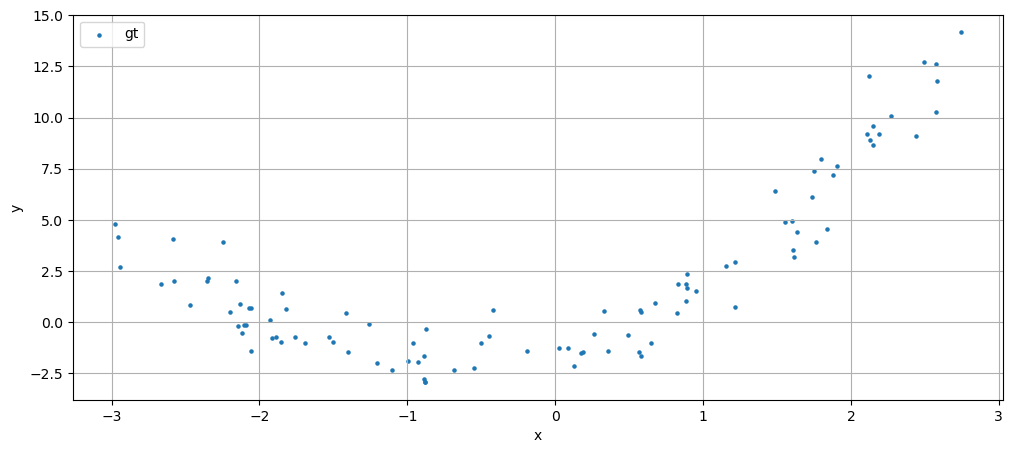

In [10]:
np.random.seed(0xAB0BA)
_a = np.random.uniform(1, 5)
_b = np.random.uniform(-3, 3)
_c = np.random.uniform(-3, 3)

num_samples = 100

xs = np.random.uniform(-3, 3, size=num_samples)
ys_clean = _a * xs ** 2 + _b * xs + _c
ys_noise = np.random.normal(0, 1, size=len(ys_clean))
ys = ys_clean + ys_noise

plt.figure(figsize=(12, 5))
plt.scatter(xs, ys, label="gt", s=5)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

In [11]:
def model(x, a, b, c):
    return a * x ** 2 + b * x + c

In [12]:
# device = torch.device("cuda:0")
device = torch.device("cpu")

Создадим переменные `xs_device` и `ys_device`, которые будут содержать обучающие данные сразу на нужном девайсе в виде тензоров.

**Вопрос:** `requires_grad=True` или `requires_grad=False`?

In [14]:
# YOUR CODE HERE

xs_device = torch.tensor(xs, requires_grad=True).to(device)
ys_device = torch.tensor(ys).to(device)

# END OF YOUR CODE

Теперь инициализируем веса `a`, `b` и `c` нормальным распределением:

In [21]:
# YOUR CODE HERE

a = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
c = torch.randn(1, requires_grad=True)

# END OF YOUR CODE

Допишем рутину обучения, чтобы получить значения весов модели.

In [23]:
num_epochs = 300
lr = 1e-4
indices = np.arange(len(xs))

loss_list = []
a_list = []
b_list = []
c_list = []


for epoch in tqdm.trange(num_epochs):
    np.random.shuffle(indices)

    loss_epoch = []
    for i in indices:
        
        # YOUR CODE HERE
        
        x = xs_device[i]
        y_true = ys_device[i]
        y_pred = model(x, a, b, c)      
        loss = torch.sqrt((y_pred - y_true) ** 2)
        loss.backward()
        
        # END OF YOUR CODE
        
        with torch.no_grad():
            a.data -= lr * a.grad.data
            b.data -= lr * b.grad.data
            c.data -= lr * c.grad.data
            a.grad.zero_()
            b.grad.zero_()
            c.grad.zero_()
            
        loss_epoch.append(loss.item())
        
    loss_list.append(np.mean(loss_epoch))
    a_list.append(a.item())
    b_list.append(b.item())
    c_list.append(c.item())

100%|██████████| 300/300 [00:10<00:00, 29.06it/s]


А теперь посмотрим на результаты:

In [24]:
xs_sorted = np.sort(xs)

ys_pred_per_epoch = []
for epoch in range(num_epochs):
    a_epoch = a_list[epoch]
    b_epoch = b_list[epoch]
    c_epoch = c_list[epoch]
    with torch.no_grad():
        ys_pred_epoch = model(xs_sorted, a_epoch, b_epoch, c_epoch)
    ys_pred_per_epoch.append(ys_pred_epoch)

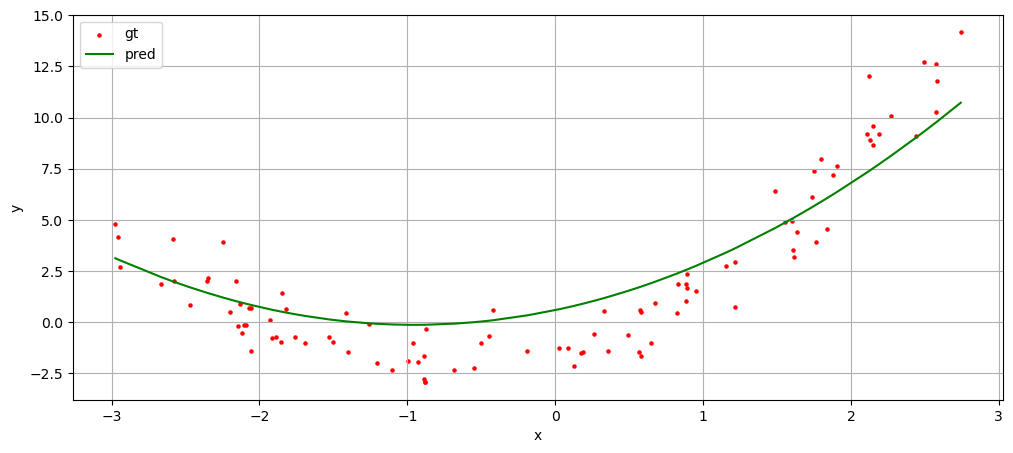

In [25]:
plt.figure(figsize=(12, 5))
plt.scatter(xs, ys, label="gt", s=5, c="r")
plt.plot(xs_sorted, ys_pred_per_epoch[-1], label="pred", c="g")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

Если есть нужные зависимости у `jupyterlab` (**осторожно, может все сломать**), можно сделать интерактивно:

In [ ]:
#!pip install ipympl

A Jupyter Widget

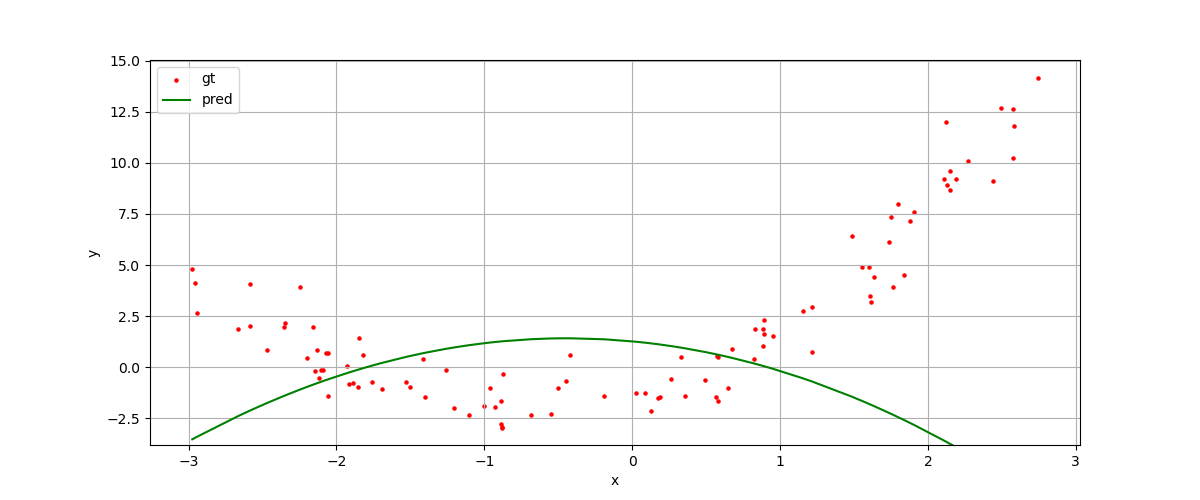

In [26]:
%matplotlib ipympl
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

x = xs_sorted

def f(x, i):
    return model(x, a_list[i], b_list[i], c_list[i])

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(xs, ys, label="gt", s=5, c="r")
line, = ax.plot(x, f(x, i), label="pred", c="g")

ax.legend()
ax.grid(True)


def update(i=0):
    line.set_ydata(f(x, i))
    fig.canvas.draw_idle()
    
interact(update, i=(0,num_epochs-1,1));

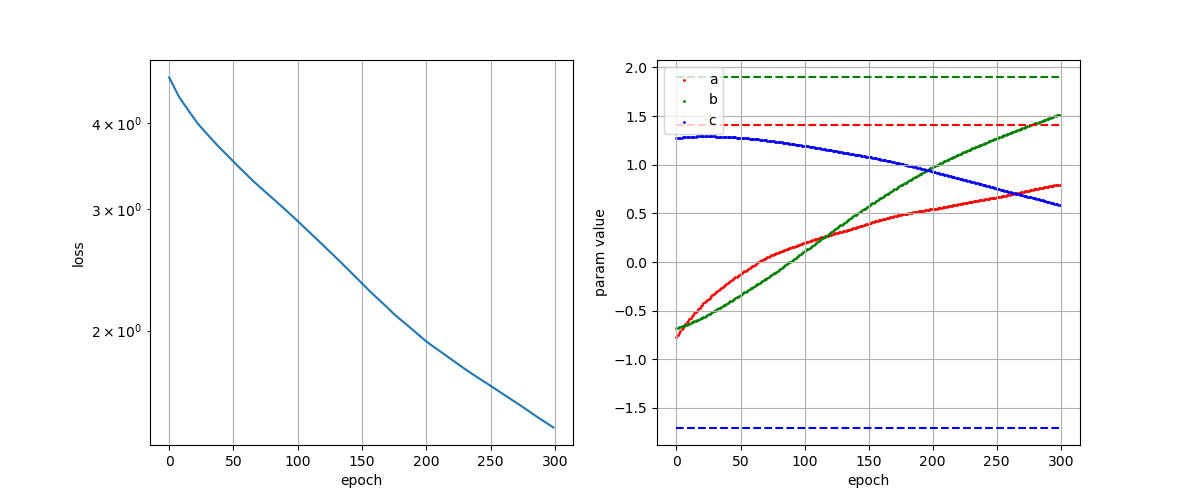

In [27]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_list)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid(True)
plt.yscale("log")

plt.subplot(1, 2, 2)
for p_name, p_gt, p_list, color in zip(("a", "b", "c"), (_a, _b, _c), (a_list, b_list, c_list), ("r", "g", "b")):
    plt.hlines(y=p_gt, xmin=0, xmax=num_epochs, linestyles="dashed", colors=color)
    plt.scatter(range(len(p_list)), p_list, label=p_name, s=1, c=color)
plt.xlabel("epoch")
plt.ylabel("param value")
plt.legend()
plt.grid(True)

plt.show()

## 4. Переопределение `backward`

Что, если нам хочется релизовать кстомный градиент для произвольной функции. 

Зачем?

 - Мы можем знать лучший способ посчитать градиент, чем делать бэкпроп для суперпозиции элементарных функций
 - Можем реализовать численно более устойчивый метод
 - Можем использовать функции из внешних библиотек
 - Использовать недифференцируемые функции?..

Рассмотрим сигмоиду:

$$ 
  \sigma(x) = \frac{1}{1+e^{-x}}
$$

Если честно распишем суперпозицию функций, то получим:

$$
  \sigma(x) = f_1 \odot f_2  \odot f_3 \odot f_4(x), where 
$$

$$
f_1 = \frac{1}{u}, f_2 = 1 + u, f_3 = \exp(u), f_4 = -u
$$

Тогда:

$$
\frac{\partial \sigma}{\partial x} = \frac{\partial \sigma}{\partial f_2}\frac{\partial f_2}{\partial f_3}
\frac{\partial f_3}{\partial f_4}
\frac{\partial f_4}{\partial x}
$$

Но зная как устроена производная можно упростить:

$$
\frac{\partial \sigma}{\partial x} = \sigma(x)(1 - \sigma(x))
$$

Вручную задать градиени функции в библиотеке PyTorch можно создав дочерний класс от [`torch.autograd.Function`](https://pytorch.org/docs/stable/notes/extending.html#extending-torch-autograd).

**NB**: Для того, чтобы сделать `backward()`, требуется знать результат `forward()`. Для этого у переменной контекста есть метод [`save_for_backward()`](https://pytorch.org/docs/stable/generated/torch.autograd.function.FunctionCtx.save_for_backward.html).

In [40]:
class MySigmoid(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x):
        # YOUR CODE HERE
        
        ctx.save_for_backward(x)
        val = torch.sigmoid(x)
        
        
        # END OF YOUR CODE
        return val
    
    @staticmethod
    def backward(ctx, grad_output):
        # YOUR CODE HERE
        
        val, = ctx.saved_tensors
        grad = grad_output * torch.sigmoid(val) * (1 - torch.sigmoid(val))
        
        # END OF YOUR CODE
        return grad

In [41]:
from torch.autograd import gradcheck

In [42]:
sigmoid = MySigmoid.apply
x = torch.rand(2, requires_grad=True)
print(gradcheck(sigmoid, x, eps=1e-4, atol=1e-3))

# be sure to use double for better approximation
x = torch.rand(2, requires_grad=True).double()
print(gradcheck(sigmoid, x, eps=1e-6, atol=1e-4))

True
True


/home/victor/anaconda3/lib/python3.7/site-packages/torch/autograd/gradcheck.py:302: UserWarning: The {}th input requires gradient and is not a double precision floating point or complex. This check will likely fail if all the inputs are not of double precision floating point or complex. 
  'The {}th input requires gradient and '


PyTorch умеет считать матрицу Якоби или матрицу Гессе для заданной функции.

In [43]:
from torch.autograd.functional import hessian, jacobian

In [44]:
jacobian(sigmoid, x)

tensor([[0.2180, 0.0000],
        [0.0000, 0.2378]], dtype=torch.float64)

In [45]:
def sum_sigmoid(x):
    return torch.sum(sigmoid(x))

In [46]:
hessian(sum_sigmoid, x)

tensor([[-0.0780,  0.0000],
        [ 0.0000, -0.0526]], dtype=torch.float64)

## Итоги

* Узнали, что такое `pytorch` и как в нем работать с тензорами
* Немного погрели GPU, запустив вычисления на нем
* Решили пример задачи, используя только библиотеку `pytorch`
* Написали собственную реализацию сигмоидальной нелинейности

Что еще почитать:
* [A gentle introduction to `torch.autograd`](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html)
* [Extending pytorch](https://pytorch.org/docs/stable/notes/extending.html#extending-torch-autograd)

В следующий раз: 
* (наконец-то) нейросети на pytorch